In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_train = pd.read_csv("7203_2017.csv", encoding="shift-jis")
data_train_reset = data_train.iloc[1:,0:1].reset_index(drop=True)
train = data_train_reset.reset_index()

In [2]:
y_train = train['7203 東証1部 トヨタ自動車(株)（輸送用機器）'].values
y_train = y_train[:,np.newaxis]

In [3]:
time_batch = 5
y_train_rm_last  = y_train[:-1]
y_train_slide = np.roll(y_train_rm_last, -time_batch)
y_train_slide = y_train_slide[:-time_batch].astype(int)

In [4]:
x_train = np.empty((240,5))
for i in range(len(y_train_slide)-time_batch):
    x_train[i:i+1] = y_train_slide[i:i+time_batch].T

特徴量5個、目的変数1つ（６次元目の特徴量）の学習データの作成完了

In [107]:
import copy 

class SimpleRNN:
    def __init__(self, W_in, W_out, W_h):
        self.W_in = W_in
        self.W_out = W_out
        self.W_h = W_h
        self.dW_h = copy.copy(self.W_h)
        self.dW_in = copy.copy(self.W_in)
        self.dW_out = copy.copy(self.W_out)
        
         
    def forward(self, x):
        self.y_pred = np.empty((1,6))
        self.z_t = np.random.rand(6,4)
        for i in range(seq_num):
            if i == 0:
                print("self.z_t:", self.z_t.shape) #(6,4)
                print("self.W_in:", self.W_in.shape) #(6,4,5)
                print("self.W_h:", self.W_h.shape) #(4,6)
                self.z_t[i:i+1,:] = np.dot(self.W_in[i,:,:], x.T)
                self.W_h[:,i:i+1] = self.z_t[i:i+1,:] 
            else :
                z_h = np.dot(self.W_h[:, i:i+1], self.z_t[i:i+1,:])
                z_in = np.dot(self.W_in[i,:,:], x.T)
                print(z_h.shape)
                print(z_in.shape)
                self.z_t = z_in + z_h
            
  

        #print("self.W_out:", self.W_out.shape)
        self.y_pred = np.sum(np.dot(self.W_out, self.W_h),axis=1)
        self.y_pred = self.y_pred[:,np.newaxis]
           
        
    def compute_error(self, x, y):
        delta = np.empty((6,1))
        for i in range(6):
            if i == 5:
                delta[i:i+1,:]= y - self.y_pred[-1,:]
            else :
                #print("self.x:", self.x.shape)
                #print("self.y_pred:", self.y_pred.shape)
                delta[i:i+1,:]= x[:,i:i+1] - self.y_pred[i:i+1,:]
        return delta
        
    def backward(self, x, y):
        '''
        各シーケンスに対して、それぞれの隠れ層の出力からの誤差を元に更新料を計算。重みを共有していない。
        '''
        self.delta = self.compute_error(x, y)
        for i in range(seq_num):
            self.dW_in[i:i+1,:] = np.dot(self.delta[i:i+1,:], x)
            self.dW_out[i:i+1,:] = np.dot(self.delta[i:i+1,:], self.z_t.T)
            #print("self.W_h:", self.W_h.shape)
            #print("self.delta:", self.delta.shape)
            
            if i == 0:
                self.dW_h[:,i:i+1] = self.W_h[:,i:i+1] * self.delta[i:i+1,:]
            else:
                self.dW_h[:,i:i+1] = self.W_h[:,i-1:i] * self.delta[i:i+1,:]
                
        self.W_in +=  self.eta * self.dW_in
        self.W_out +=  self.eta * self.dW_out
        self.W_h +=  self.eta * self.dW_h
        return self.delta
    
    def fit(self, x, y, iteration, batch_size, eta):
        self.eta = eta
        loss = []
        self.batch_size = batch_size
        self.x_train = x
        self.y_train = y
        
        for i in range(iteration):
            self.x_mini, self.y_mini = self.mini_batch()
            self.forward(self.x_mini)    
            self.delta = self.backward(self.x_mini, self.y_mini)
            delta_sum = np.mean(self.delta, axis=0)
            loss.append(delta_sum)
            print("loss:", delta_sum)
        return loss
    
    def predict(self, x_test):
        self.z_t = np.dot(self.W_in, x_test.T)
        y_pred = np.dot(self.w_out, self.z_t)
        return y_pred
    
    def mini_batch(self):
        p = np.random.permutation(self.batch_size)
        self.x_mini = self.x_train[p]
        self.y_mini = self.y_train[p]
        return self.x_mini, self.y_mini

In [108]:
batch_size = 1
node = 4
seq_num = 6
w_in = np.random.rand(seq_num, node, x_train.shape[1])*0.00001
w_out = np.random.rand(seq_num, node)*0.00001
w_h = np.random.rand(node, seq_num)*0.00001

In [109]:
rnn = SimpleRNN(w_in, w_out, w_h)
h_test = rnn.fit(x_train[1:2], y_train_slide[1:2], 10, batch_size, 0.0000000005)

self.z_t: (6, 4)
self.W_in: (6, 4, 5)
self.W_h: (4, 6)


ValueError: could not broadcast input array from shape (4,1) into shape (1,4)

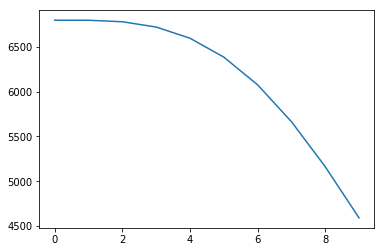

In [47]:
plt.plot(h_test)
plt.show()